In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
:parameter
--------------------
data: n-array like
[
[1.0 2.3 2.1 0.2]
[0.0 2.4 1.1 0.7]
]
每个元素都是有表示距离的属性的，对于没有距离属性的要抓化成具有距离属性的
"""

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

dir_name = '/Users/changqingli/data/time_space_cluster/'
feat_file_mini = 'fs_mini'
feat_file_all = 'fs_all'

f_data = []
user_info = []

def key_count(cluster_y):
    m = {}
    for i in cluster_y:
        if i not in m:
            m.setdefault(i, 0)
        m[i] += 1
    res = sorted(m.items(), key=lambda x: x[1], reverse=True)
    return res



In [2]:
with open(dir_name + feat_file_all, 'r') as f:
    for line in f:
        line = line.strip().split("\t")[:-1]
        line.insert(1, line[0][:4])  # _year
        line.insert(2, line[0][5:7])  # _month
        line.insert(3, line[0][8:10])  # _date
        line.insert(4, line[0][11:13])  # _hour
        f_data.append(line[1:-1])  # [_year,_month,_date,_hour,latitude,longitude]
        user_info.append([line[0], line[-1]])
scale = MinMaxScaler()
scale.fit(f_data)
f_data_transform = scale.transform(f_data)
f_data_transform_train, f_data_transform_test = train_test_split(f_data_transform, test_size=0.2, random_state=0)



In [14]:
user_info[:2]

[['2019-09-21 13:15:46', '84.907643', 'tzuksjgc'],
 ['2019-09-21 20:14:34', '86.056341', 'tzvhn282']]

In [3]:
k_means = KMeans()
k_means.fit(f_data_transform_train)
cluster_train_counts = key_count(k_means.labels_)
print(cluster_train_counts)



[(0, 468933), (1, 350066), (5, 259002), (3, 247655), (2, 238143), (6, 222103), (7, 150580), (4, 71436)]


In [4]:
test_label = k_means.predict(f_data_transform_test)
cluster_test_counts = key_count(test_label)
print(cluster_test_counts)



[(0, 117249), (1, 87438), (5, 64652), (3, 61904), (2, 59643), (6, 55490), (7, 37720), (4, 17884)]


In [5]:
test_label = np.reshape(test_label, [len(test_label), -1])

print(np.shape(f_data_transform_test))
print(np.shape(test_label))



(501980, 6)
(501980, 1)


In [6]:
tsne = TSNE()

tsne.fit_transform(test_label)  # 进行数据降维,降成两维


array([[-0.6171269 ,  0.1657651 ],
       [-1.4903691 , -6.3582335 ],
       [ 1.3289063 ,  7.8332467 ],
       ...,
       [ 1.3315119 ,  8.404679  ],
       [-6.6143904 , -1.9158635 ],
       [-0.61705774,  0.16582675]], dtype=float32)

In [7]:
cluster_test = np.concatenate((tsne.embedding_, test_label.reshape([len(test_label), 1])), axis=1)

df=pd.DataFrame(cluster_test, columns=['f_0', 'f_1', 'label']) #转换数据格式




In [8]:
df.head()

,f_0,f_1,label
0,-0.617127,0.165765,0.0
1,-1.490369,-6.358233,3.0
2,1.328906,7.833247,7.0
3,4.807472,2.597097,1.0
4,-0.617189,0.165765,0.0


label 0 has 117249 sample
label 1 has 87438 sample
label 2 has 59643 sample
label 3 has 61904 sample
label 4 has 17884 sample
label 5 has 64652 sample
label 6 has 55490 sample
label 7 has 37720 sample


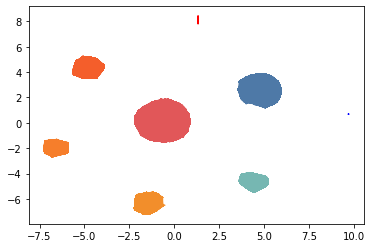

In [9]:

colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']

for i in range(8):
    d=df[df['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    plt.plot(d['f_0'].values, d['f_1'].values, colr[i])
    


label 0 has 117249 sample
label 1 has 87438 sample
label 2 has 59643 sample
label 3 has 61904 sample
label 4 has 17884 sample
label 5 has 64652 sample
label 6 has 55490 sample
label 7 has 37720 sample


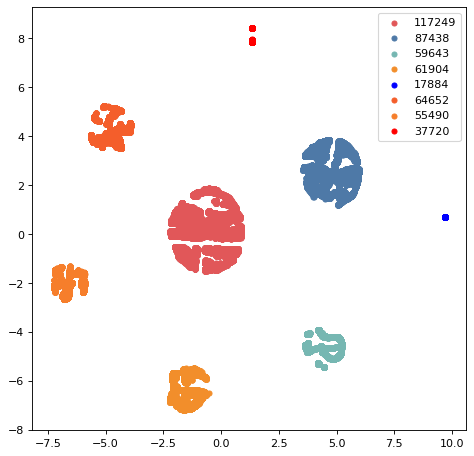

In [10]:
colr = ['#E15759', '#4E79A7', '#76B7B2', '#F28E2B','blue','#F45E2B','#F67E2B', 'r']

plt.figure(figsize=(7, 7), dpi=80)
axes = plt.subplot(111)
types = []
nums = []
for i in range(8):
    d=df[df['label']==i]
    print("label %d has %d sample" % (i, len(d['f_1'].values)))
    type1 = axes.scatter(d['f_0'].values, d['f_1'].values, s=20, c=colr[i])
    types.append(type1)
    nums.append(len(d['f_1'].values))
axes.legend(types, nums, loc=1)

d=df[df['label']==2]